# Cars selling

##### Made by: Pavlo Kukurik, Sviatoslav Sharak

## **DATA DESCRIPTION**
 * **Size:** We have 558,837 observations (data points). 
* **Features (16 total):**
    * **Quantitative Features (Features with numerical values)**
        * **`year`** (int64): The vehicle's manufacturing year.
        * **`condition`** (float64):  The condition of the vehicle (likely on a numerical scale).
        * **`odometer`** (float64): The vehicle's mileage.
        * **`mmr`** (float64):  The Mannheim Market Report value (estimated market value).
        * **`sellingprice`** (float64): The final price at which the vehicle was sold.

    * **Qualitative Features (Features with categorical values)**
        * **`make`** (object): The vehicle's brand/manufacturer.
        * **`model`** (object):  The vehicle's specific model.
        * **`trim`** (object): Additional specification within the model.
        * **`body`** (object):  The vehicle's body type (e.g., Sedan, SUV, etc.).
        * **`transmission`** (object): The type of transmission (e.g., automatic, manual).
        * **`vin`** (object): The vehicle's unique Vehicle Identification Number.
        * **`state`** (object): The state where the vehicle is registered.
        * **`color`** (object): The vehicle's exterior color. 
        * **`interior`** (object): The vehicle's interior color.
        * **`seller`** (object): The entity that sold the vehicle.
        * **`saledate`** (object): The date and time of the sale.


In [1]:
# importing libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_prices.csv')
df.head(1000)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2012,Ford,Escape,Limited,SUV,automatic,1fmcu0e7xckc08558,ca,47.0,30843.0,white,beige,ford motor credit company llc pd,15750.0,16000.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
996,2012,Dodge,Grand Caravan,American Value Package,Minivan,automatic,2c4rdgbgxcr138394,ca,44.0,97805.0,silver,black,wheels exchange llc,7975.0,8900.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
997,2012,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pf5sc5c7318718,ca,42.0,26691.0,white,gray,ge fleet services for itself/servicer,10450.0,11500.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
998,2012,Dodge,Grand Caravan,SXT,Minivan,automatic,2c4rdgcg2cr308102,ca,29.0,54064.0,black,beige,tdaf remarketing,10650.0,11750.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### **Firstly Let`s clean our dataset**

In [4]:
# First let`s drop useless columns (vin, seller).
if 'vin' in df.columns:
    df = df.drop(columns='vin')

if 'seller' in df.columns:
    df = df.drop(columns='seller')

# # Delete all NaN rows from dataset    
df = df.dropna()

In [5]:
# Let`s check how many values in each column are NaM
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [6]:
# # Here we can see how df has changed 
df.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [7]:
def has_no_capital_letters(text):
    return not bool(re.search(r'[A-Z]', text))

bad_make_labels=[make for make in df['make'].unique() if has_no_capital_letters(make)]
make_labels_dict={bad_make_label:bad_make_label.title() for bad_make_label in bad_make_labels}

In [8]:
df['make']=df['make'].apply(lambda x:make_labels_dict[x] if x in make_labels_dict else x)
sorted(df['make'].dropna().unique().tolist())

['Acura',
 'Aston Martin',
 'Audi',
 'BMW',
 'Bentley',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Daewoo',
 'Dodge',
 'FIAT',
 'Ferrari',
 'Fisker',
 'Ford',
 'GMC',
 'Geo',
 'HUMMER',
 'Honda',
 'Hyundai',
 'Infiniti',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Kia',
 'Lamborghini',
 'Land Rover',
 'Lexus',
 'Lincoln',
 'Lotus',
 'MINI',
 'Maserati',
 'Mazda',
 'Mercedes-Benz',
 'Mercury',
 'Mitsubishi',
 'Nissan',
 'Oldsmobile',
 'Plymouth',
 'Pontiac',
 'Porsche',
 'Ram',
 'Rolls-Royce',
 'Saab',
 'Saturn',
 'Scion',
 'Smart',
 'Subaru',
 'Suzuki',
 'Tesla',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [9]:
make_labels_dict_2={
    'Bmw':'BMW',
    'Ford Tk':'Ford Truck',
    'Gmc':'GMC',
    'Gmc Truck':'GMC Truck',
    'Landrover':'Land Rover',
    'Mercedes-B':'Mercedes-Benz',
    'Mercedes':'Mercedes-Benz',
    'Vw':'Volkswagen',
}

df['make']=df['make'].apply(lambda x:make_labels_dict_2[x] if x in make_labels_dict_2 else x)
df['make']=df['make'].str.replace(' Tk', ' Truck',regex=True)
df['make'].nunique()

53

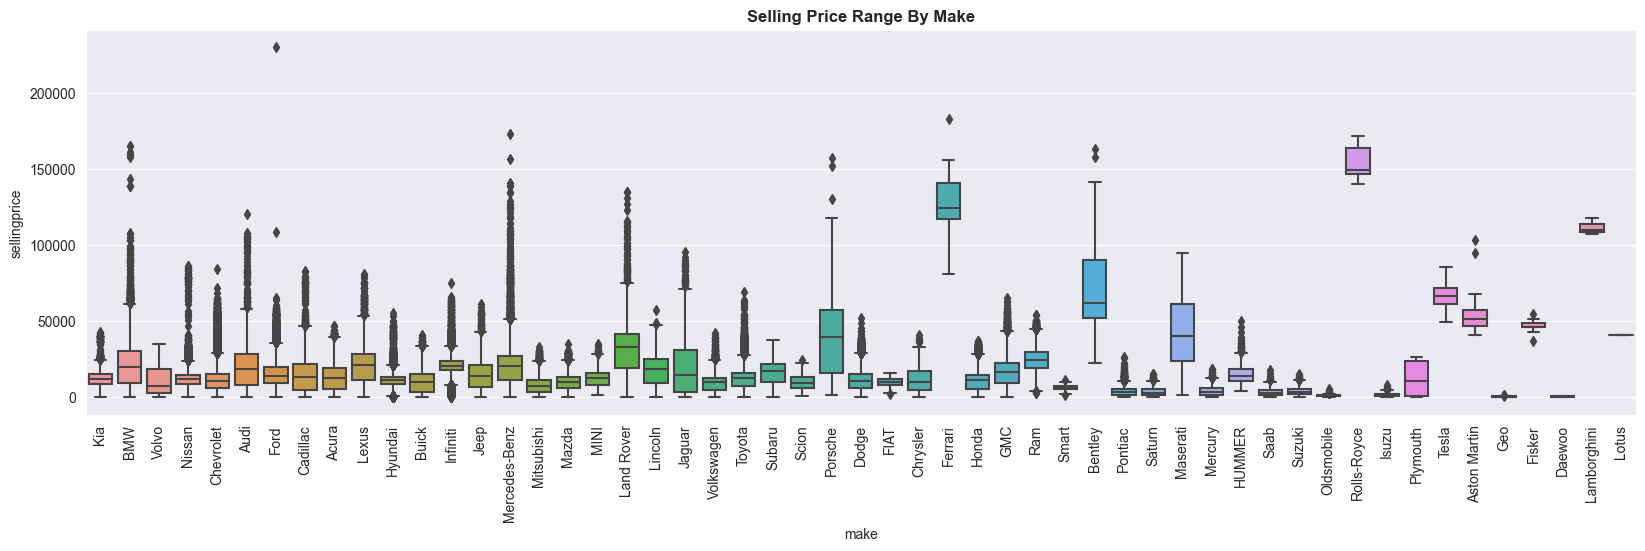

In [10]:
plt.figure(figsize=(20,5))
sns.boxplot(df,x='make',y='sellingprice')
plt.title('Selling Price Range By Make',fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [11]:
bad_body_labels = [body for body in df['body'].unique() if has_no_capital_letters(body)]
body_labels_dict = {bad_body_label: bad_body_label.title() for bad_body_label in bad_body_labels}
df['body'] = df['body'].apply(lambda x: body_labels_dict[x] if x in body_labels_dict else x)
sorted(df['body'].dropna().unique().tolist())

['Access Cab',
 'Beetle Convertible',
 'CTS Coupe',
 'CTS Wagon',
 'CTS-V Coupe',
 'CTS-V Wagon',
 'Cab Plus',
 'Cab Plus 4',
 'Club Cab',
 'Convertible',
 'Coupe',
 'Crew Cab',
 'CrewMax Cab',
 'Crewmax Cab',
 'Cts Coupe',
 'Cts Wagon',
 'Cts-V Coupe',
 'Double Cab',
 'E-Series Van',
 'Elantra Coupe',
 'Extended Cab',
 'G Convertible',
 'G Coupe',
 'G Sedan',
 'G37 Convertible',
 'G37 Coupe',
 'Genesis Coupe',
 'GranTurismo Convertible',
 'Granturismo Convertible',
 'Hatchback',
 'King Cab',
 'Koup',
 'Mega Cab',
 'Minivan',
 'Promaster Cargo Van',
 'Q60 Convertible',
 'Q60 Coupe',
 'Quad Cab',
 'Ram Van',
 'Regular Cab',
 'Regular-Cab',
 'SUV',
 'Sedan',
 'SuperCab',
 'SuperCrew',
 'Supercab',
 'Supercrew',
 'Suv',
 'TSX Sport Wagon',
 'Transit Van',
 'Tsx Sport Wagon',
 'Van',
 'Wagon',
 'Xtracab']

In [27]:
car_body_mapping = {
    'Access Cab': 'Cab',
    'Beetle Convertible': 'Convertible',
    'CTS Coupe': 'Coupe',
    'CTS Wagon': 'Wagon',
    'CTS-V Coupe': 'Coupe',
    'CTS-V Wagon': 'Wagon',
    'Cab Plus': 'Cab',
    'Cab Plus 4': 'Cab',
    'Club Cab': 'Cab',
    'Convertible': 'Convertible',
    'Coupe': 'Coupe',
    'Crew Cab': 'Cab',
    'CrewMax Cab': 'Cab',
    'Crewmax Cab': 'Cab',
    'Cts Coupe': 'Coupe',
    'Cts Wagon': 'Wagon',
    'Cts-V Coupe': 'Coupe',
    'Double Cab': 'Cab',
    'E-Series Van': 'Van',
    'Elantra Coupe': 'Coupe',
    'Extended Cab': 'Cab',
    'G Convertible': 'Convertible',
    'G Coupe': 'Coupe',
    'G Sedan': 'Sedan',
    'G37 Convertible': 'Convertible',
    'G37 Coupe': 'Coupe',
    'Genesis Coupe': 'Coupe',
    'GranTurismo Convertible': 'Convertible',
    'Granturismo Convertible': 'Convertible',
    'Hatchback': 'Hatchback',
    'King Cab': 'Cab',
    'Koup': 'Coupe',
    'Mega Cab': 'Cab',
    'Minivan': 'Van',
    'Promaster Cargo Van': 'Van',
    'Q60 Convertible': 'Convertible',
    'Q60 Coupe': 'Coupe',
    'Quad Cab': 'Cab',
    'Ram Van': 'Van',
    'Regular Cab': 'Cab',
    'Regular-Cab': 'Cab',
    'SUV': 'SUV',
    'Sedan': 'Sedan',
    'SuperCab': 'Cab',
    'SuperCrew': 'Cab',
    'Supercab': 'Cab',
    'Supercrew': 'Cab',
    'Suv': 'SUV',
    'TSX Sport Wagon': 'Wagon',
    'Transit Van': 'Van',
    'Tsx Sport Wagon': 'Wagon',
    'Van': 'Van',
    'Wagon': 'Wagon',
    'Xtracab': 'Cab'
}

df['body']=df['body'].apply(lambda x:car_body_mapping[x] if x in car_body_mapping else x)
df['body']=df['body'].str.replace(' Tk', ' Truck',regex=True)
df['body'].value_counts()

Sedan          218237
SUV            120968
Cab             40496
Van             26633
Hatchback       23821
Coupe           18161
Wagon           14263
Convertible      9746
Name: body, dtype: int64

In [13]:
df['transmission']=df['transmission'].apply(lambda x:x if x in ['automatic','manual'] else np.nan)
df['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [14]:
df['state']=df['state'].apply(lambda x:x if len(x)==2 else None)
df['state']=df['state'].str.upper()

<AxesSubplot: title={'center': 'odometer vs sellingprice'}, xlabel='condition', ylabel='sellingprice'>

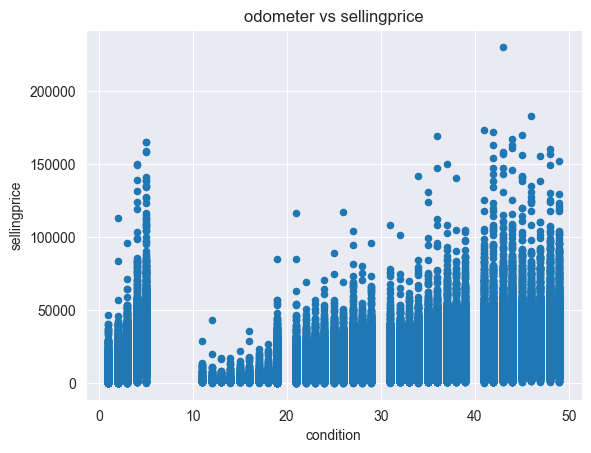

In [15]:
df.plot.scatter(x='condition',y='sellingprice',title='odometer vs sellingprice')

<AxesSubplot: title={'center': 'odometer vs sellingprice'}, xlabel='condition', ylabel='sellingprice'>

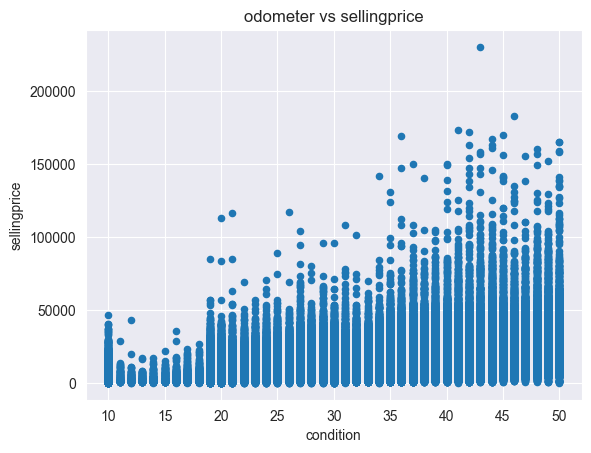

In [16]:
# some condition values range between 1 and 5, some bewteen 10 and 50
# scale is different for these two groups
#1==10, 2==20... 5==50 as we understand it
df['condition']=df['condition'].apply(lambda x:x*10 if x<=5 else x)
# After transformation
df.plot.scatter(x='condition',y='sellingprice',title='odometer vs sellingprice')

In [17]:
colors=[]

for color in df['color']:
    if any([i in str(color) for i in ['1','2','3','4','5','6','7','8','9']]):
        colors.append(None)
    else:
        colors.append(color)

df['color']=colors

df['color']=colors
df['color']=df['color'].replace('—',np.nan)
df['color'].unique().tolist()

['white',
 'gray',
 'black',
 'red',
 'silver',
 'brown',
 'beige',
 'blue',
 'purple',
 'burgundy',
 nan,
 'gold',
 'yellow',
 'green',
 'charcoal',
 'orange',
 'off-white',
 'turquoise',
 'pink',
 'lime']

In [18]:
df['interior']=df['interior'].replace('—',np.nan)
df['interior'].nunique()

16

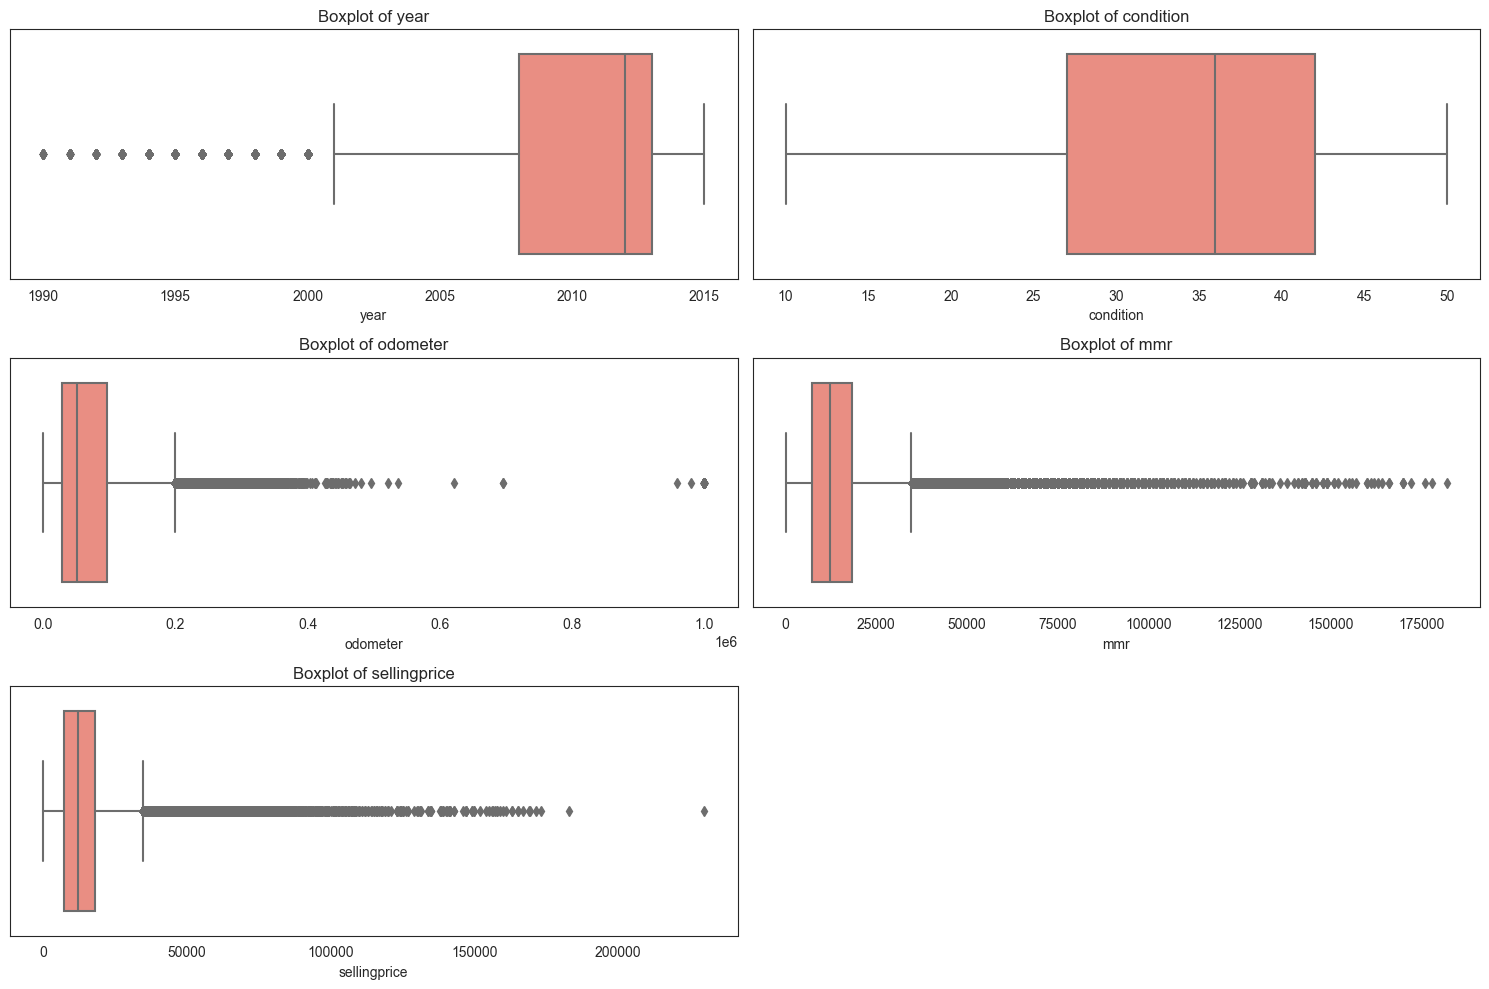

In [19]:
# Let visualise boxplot to see outliers for each numeric columns
def box_plot(data: pd.DataFrame) -> plt:
    """
    The func visualise the boxplot
    :param data: name of dataframe
    :return: plot
    """
    sns.set_style("white")
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, 10))
    
    for i, col in enumerate(numeric_cols):
        plt.subplot(len(numeric_cols)//2 + 1, 2, i+1)
        sns.boxplot(x=data[col], color='salmon')
        plt.title(f'Boxplot of {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
    plt.tight_layout()
    plt.show()
    
box_plot(df)

In [20]:
def bound_counter(data: pd.DataFrame) -> tuple[pd, pd]:
    """
    The func calculate upper and lower bounds
    :param data: name of dataset
    :return: values of bounds
    """
    Q1 = data.quantile(0.25, numeric_only=True)
    Q3 = data.quantile(0.75, numeric_only=True)
    
    IQR = Q3 - Q1
    
    threshold = 1.5
    
    lower_bound_ = Q1 - threshold * IQR
    upper_bound_ = Q3 + threshold * IQR
    
    return lower_bound_, upper_bound_
    
def outliers_counter(data: pd.DataFrame) -> str:
    """
    The func calculate number of outliers for each column in the dataset 
    :param data: name of dataset
    :return: number of outliers for each column
    """
    # df_clipped = data.clip(lower=lower_bound, upper=upper_bound, axis=1)

    outliers_count = ((data.select_dtypes(include=['float64', 'int64']) < bound_counter(data)[0]) |
                      (data.select_dtypes(include=['float64', 'int64']) > bound_counter(data)[1])).sum()

    return f"Number of outliers for each numerical column:\n{outliers_count}"

print(outliers_counter(df))

Number of outliers for each numerical column:
year             9799
condition           0
odometer         9029
mmr             14038
sellingprice    14118
dtype: int64


Number of outliers for each numerical column:
year               0
condition          0
odometer        2271
mmr             3070
sellingprice    2729
dtype: int64


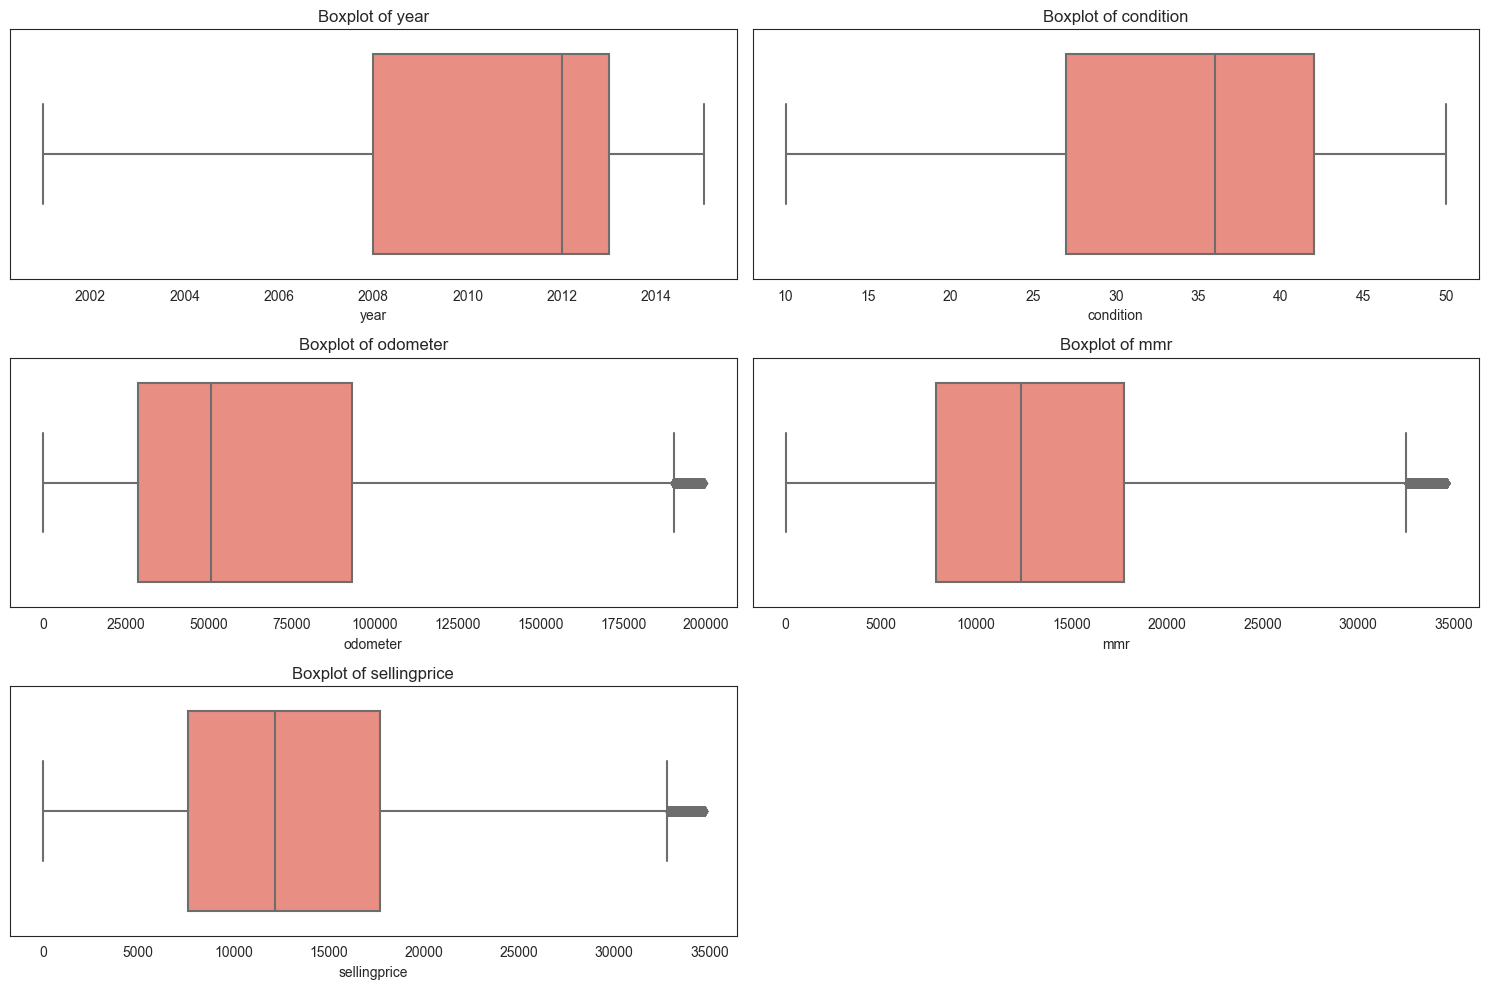

In [21]:
lower_bound, upper_bound = bound_counter(df)
    
mask = ((df.select_dtypes(include=['float64', 'int64']) >= lower_bound) & 
        (df.select_dtypes(include=['float64', 'int64']) <= upper_bound))

clean_data = df[mask.all(axis=1)]
print(outliers_counter(clean_data))
box_plot(clean_data)

In [22]:
clean_data = clean_data.copy()
clean_data['saledate'] = pd.to_datetime(clean_data['saledate'], utc=True)
clean_data['sale_year'] = clean_data['saledate'].dt.year
# we need only information about cars witch was sold in 2015. So let`s remove 2014
clean_data = clean_data[clean_data['sale_year'] == 2015]

In [23]:

# clean_data['make'].unique().tolist()

### **Now when we clear our dataset from Nan values and useless columns let`s see some interesting information that consider this dataset**

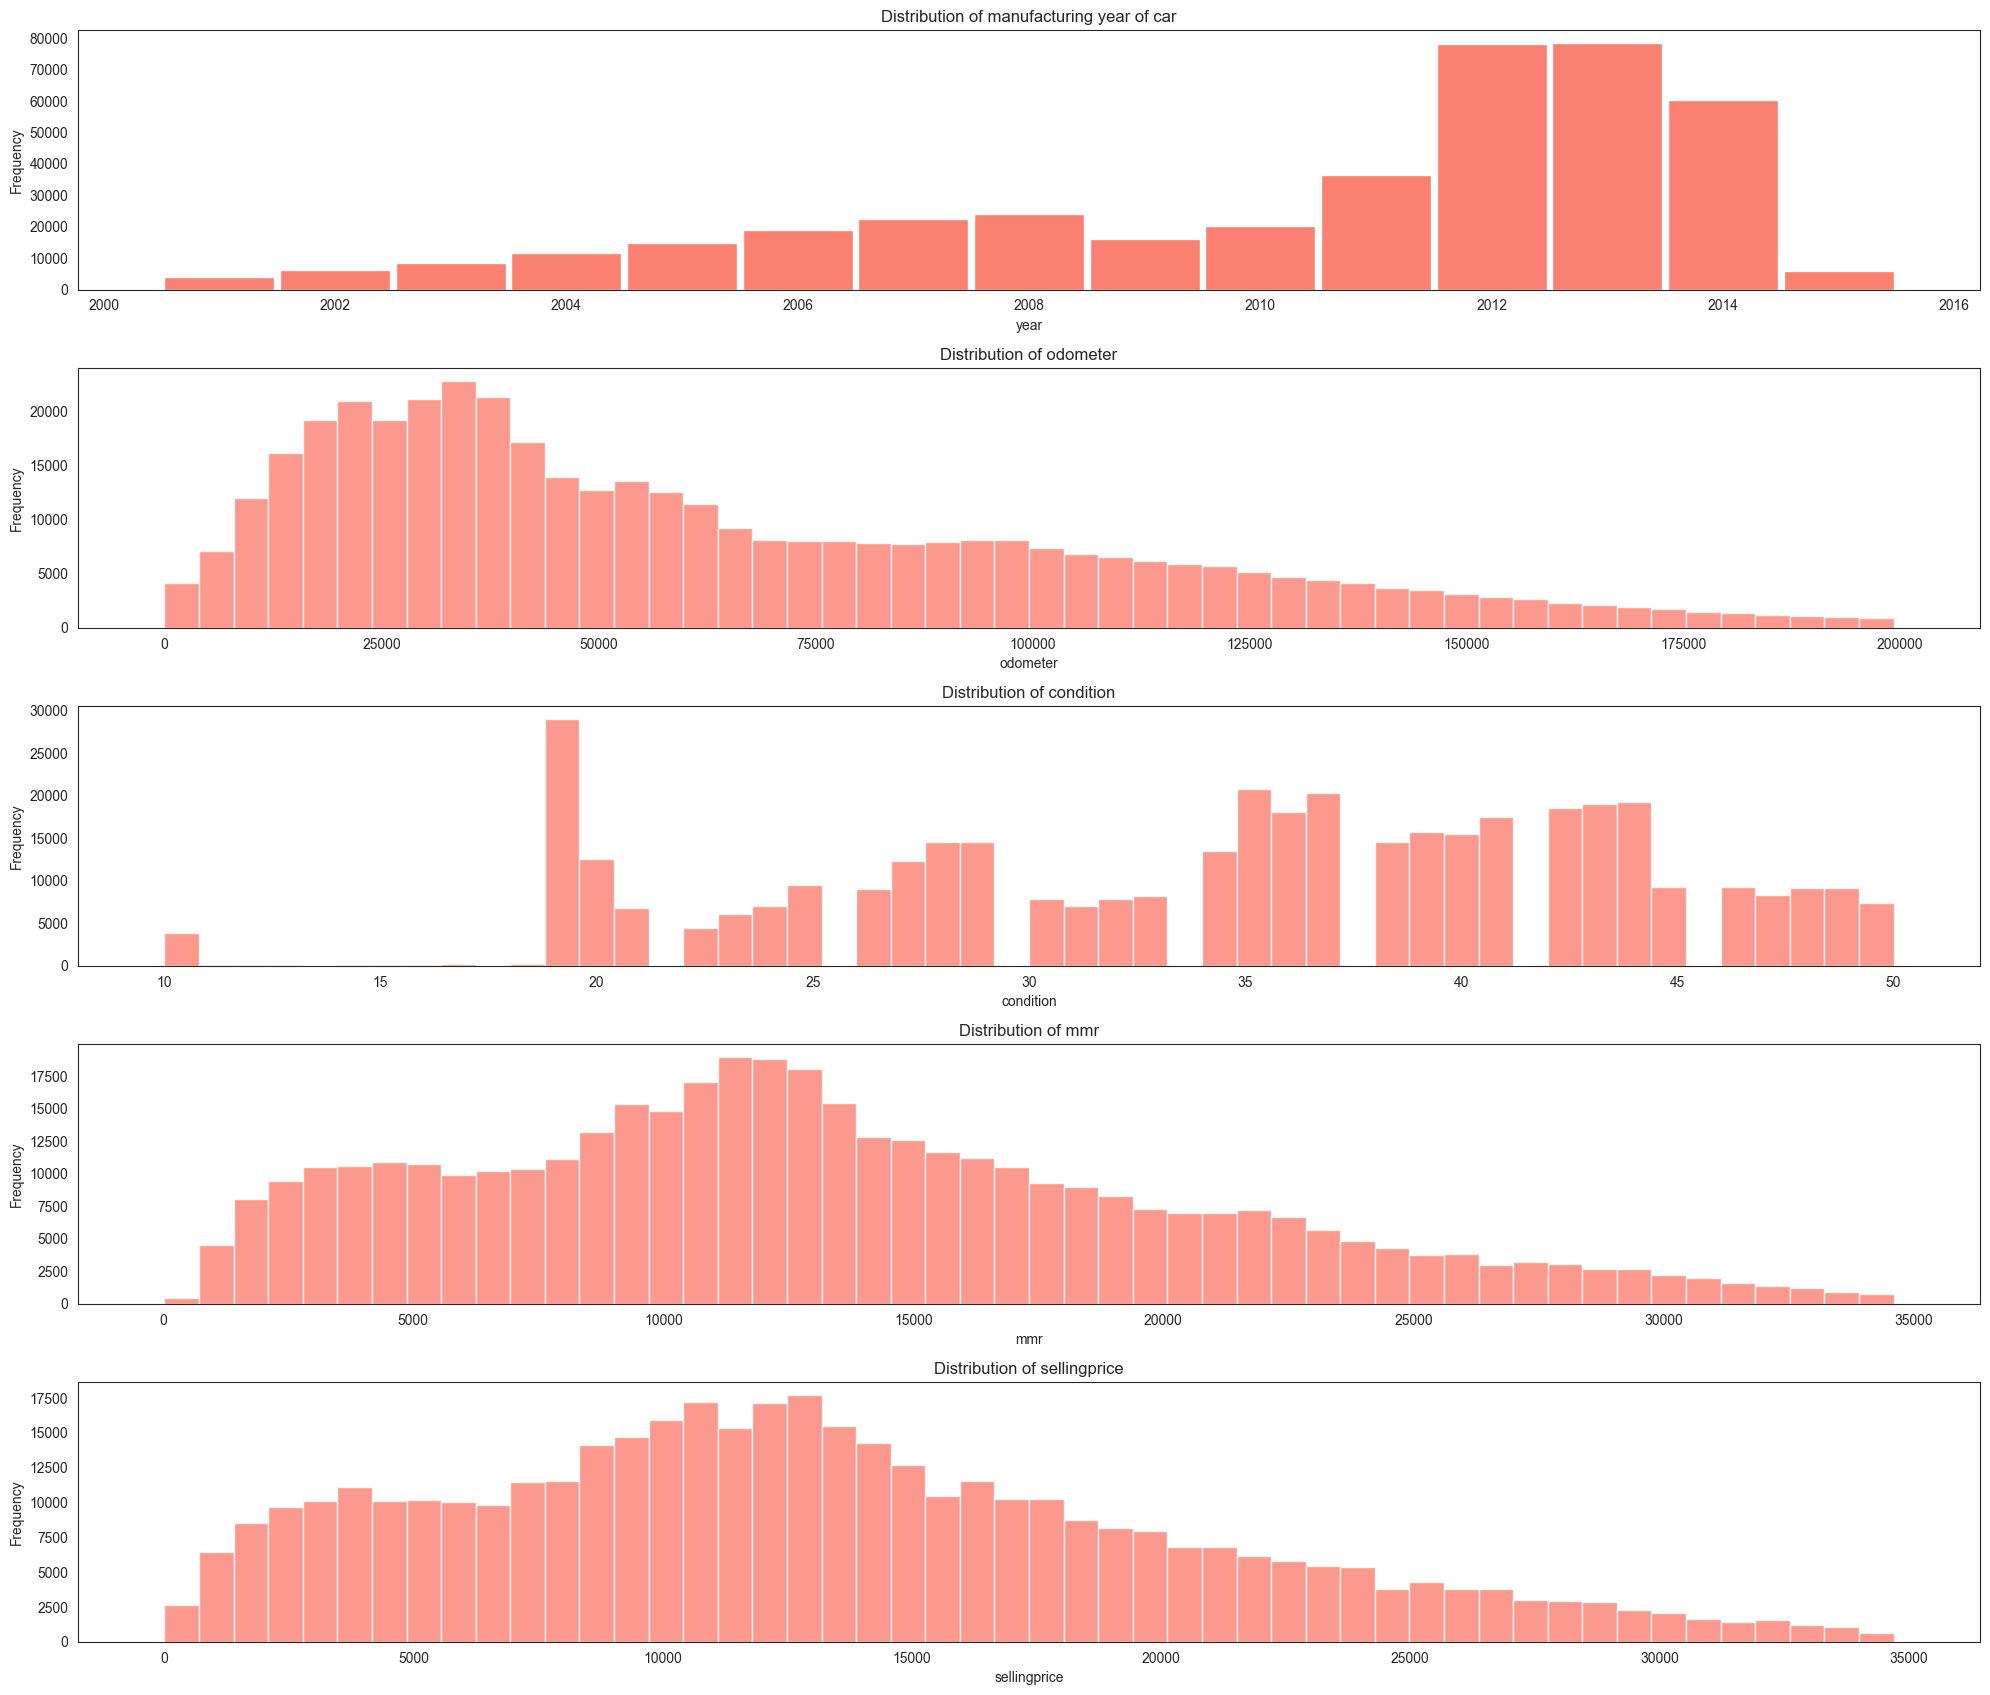

In [24]:
# plt.style.use('seaborn-white')

def plot_distribution(data_name: pd.DataFrame, column_name: list[str]) -> None:
    """
    The func plot distribution for columns in the dataframe
    :param data_name: Name of data
    :param column_name: name of column to plot
    """
    num_plots = len(column_name) + 1
    plt.figure(figsize=(20, 20))

    for num, name in enumerate(column_name, start=1):
        plt.subplot(num_plots, 1, num)
        if name == 'year':
            cars_sold_by_year = data_name[name].value_counts().sort_index()
            plt.bar(cars_sold_by_year.index, cars_sold_by_year.values, color='salmon', width=0.95)
            plt.title('Distribution of manufacturing year of car')

        else:
            plt.hist(data_name[name], bins=50, color='salmon', alpha=0.8)
            plt.title(f'Distribution of {name}')
            
        plt.xlabel(f'{name}')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_distribution(clean_data, ['year', 'odometer', 'condition', 'mmr', 'sellingprice'])

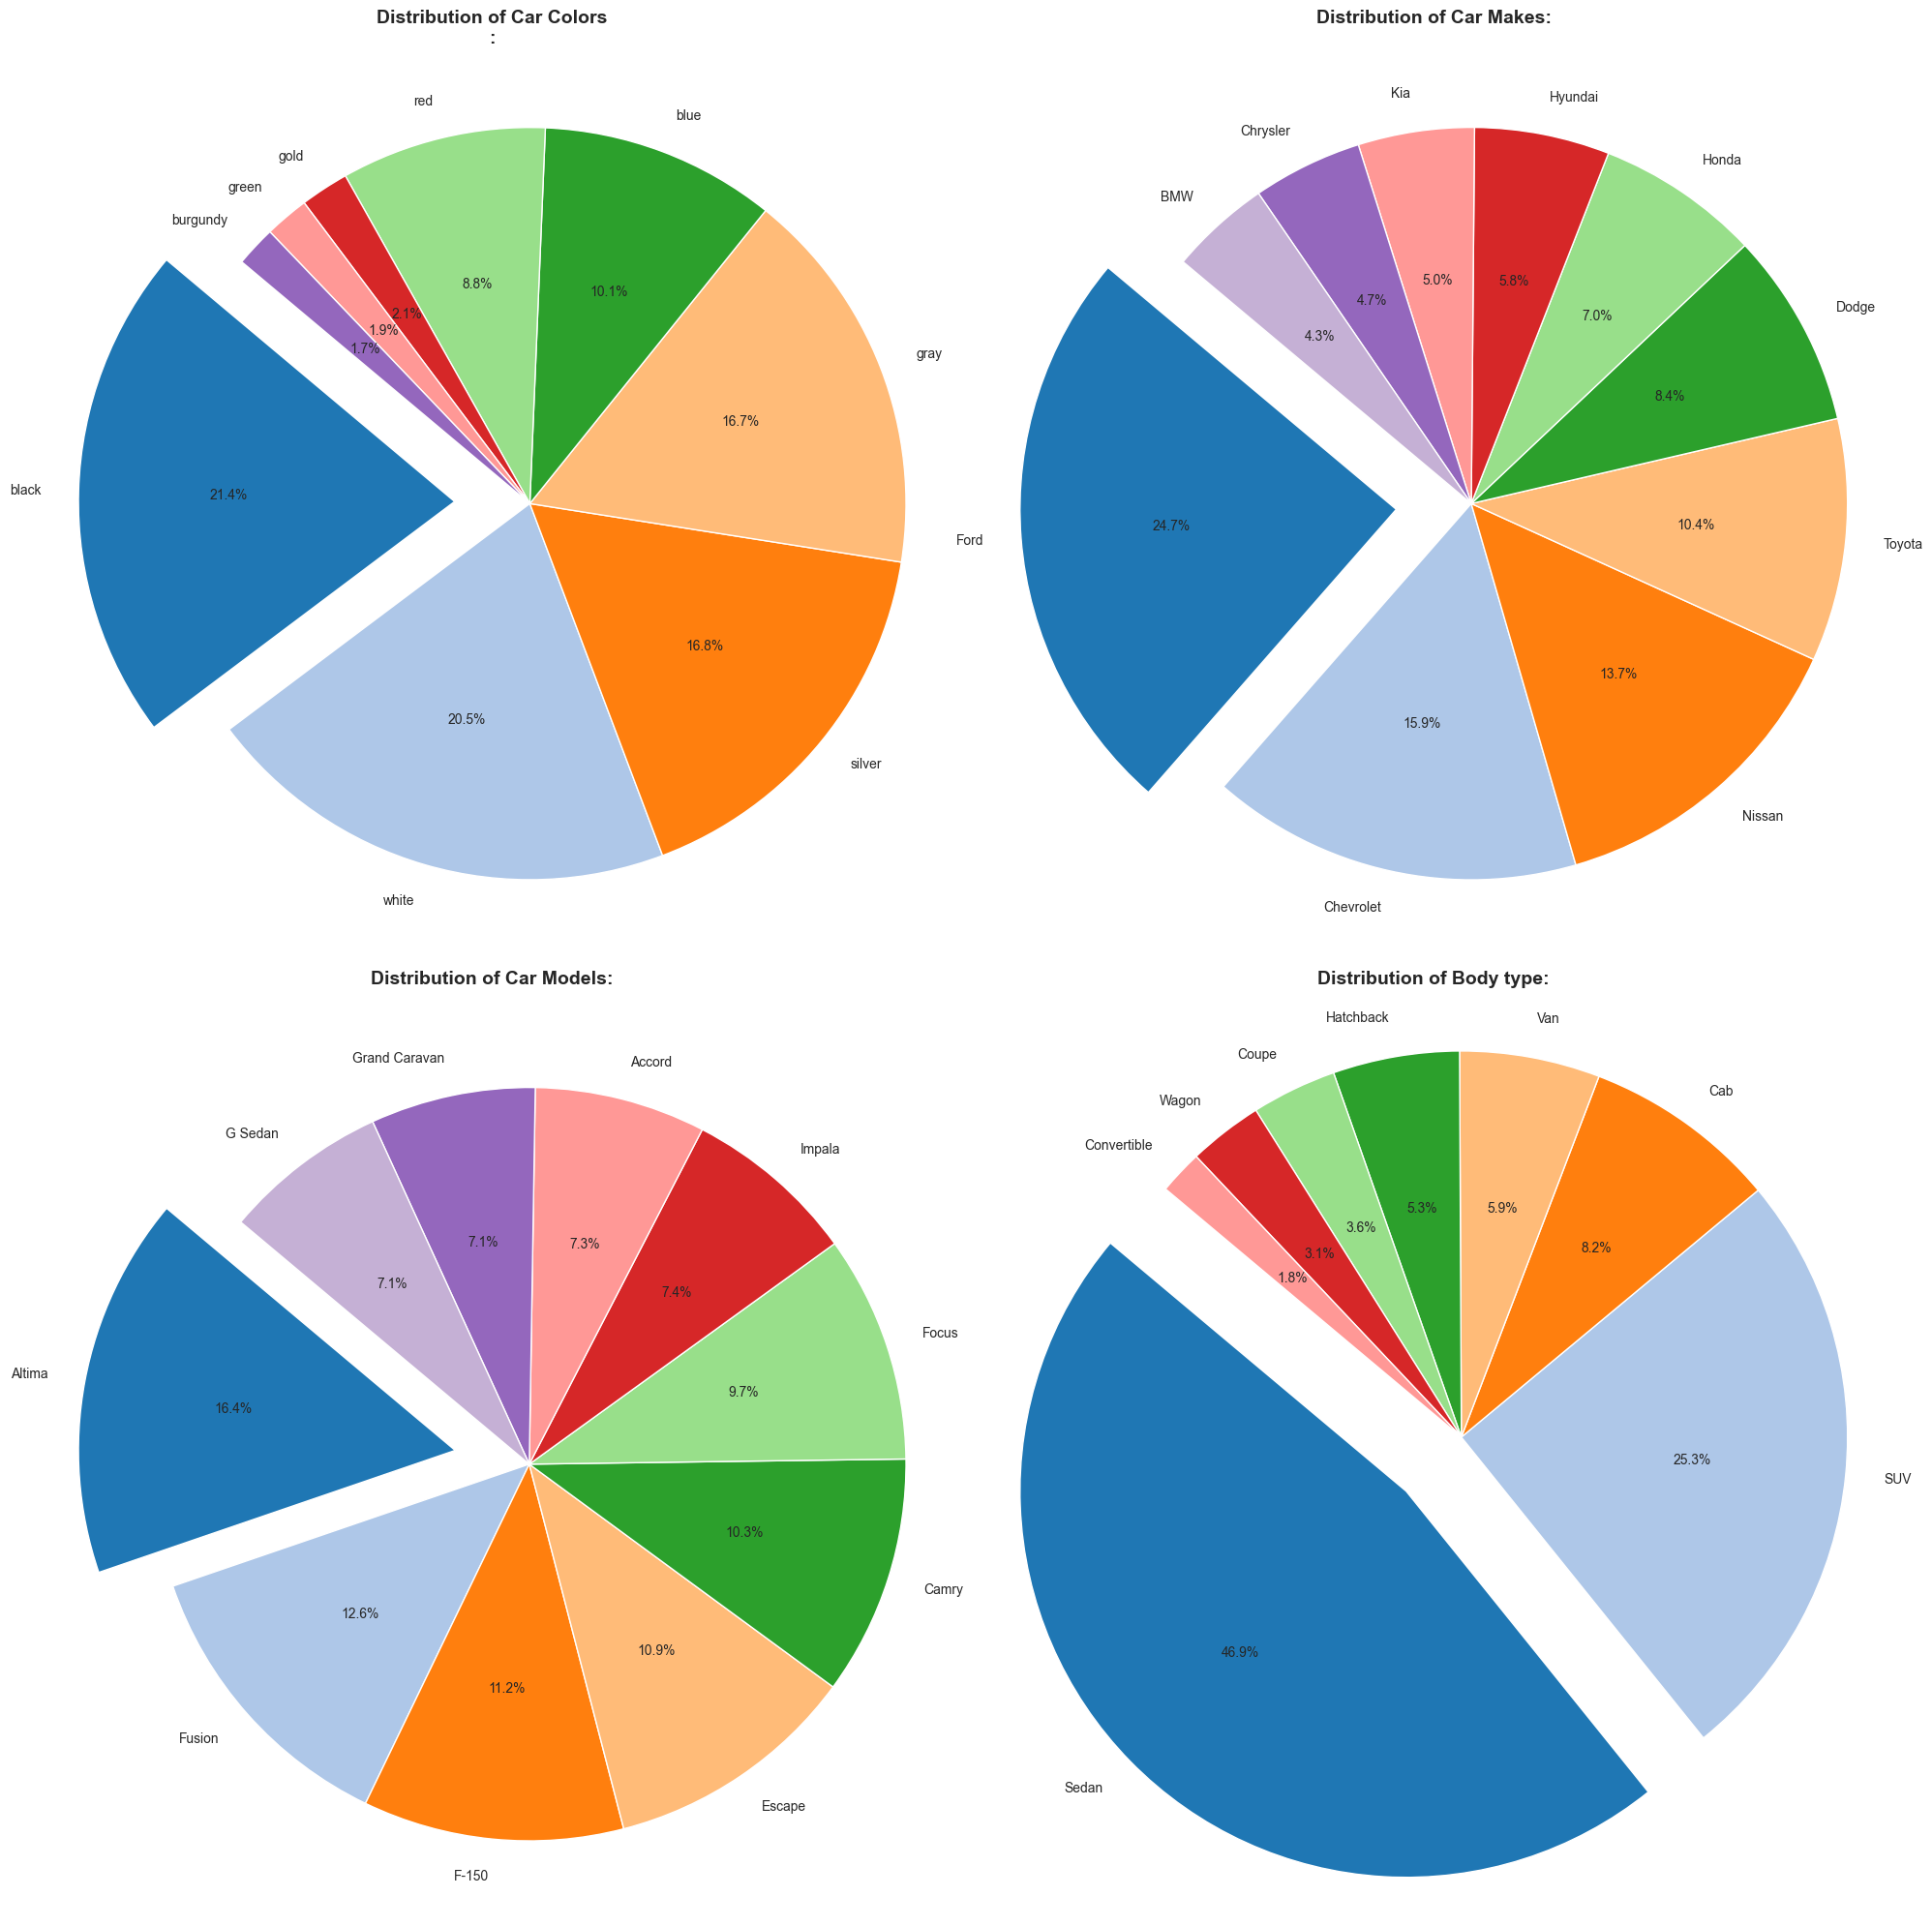

In [31]:
# Let`s see the moat popular color, model and brand
def plot_pie_chart(column, title, limit=10, ax=None):
    """
    The function plots a pie chart diagram
    :param column: name of column in dataset to plot
    :param title: title of plot
    :param limit: limit of chart
    :param ax: matplotlib axes to plot on
    :return: plot
    """
    counts = clean_data[column].value_counts().head(limit)
    colours = plt.cm.tab20.colors[:len(counts)]
    explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)[:limit]
    
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colours, explode=explode, wedgeprops=dict(width=1))
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axis('equal')

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

plot_pie_chart('color', 'Distribution of Car Colors\n:', limit=9, ax=axs[0, 0])
plot_pie_chart('make', 'Distribution of Car Makes:\n', ax=axs[0, 1])
plot_pie_chart('model', 'Distribution of Car Models:\n', ax=axs[1, 0])
plot_pie_chart('body', 'Distribution of Body type:\n', limit=8, ax=axs[1, 1])

plt.tight_layout()
plt.show()

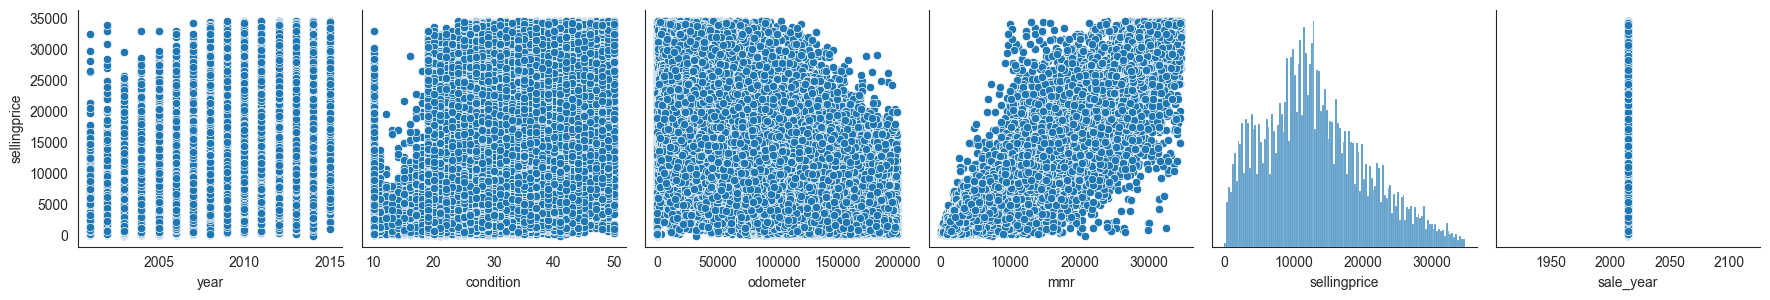

In [32]:
sns.pairplot(data=clean_data, y_vars='sellingprice', height=3, kind='scatter')
plt.show()

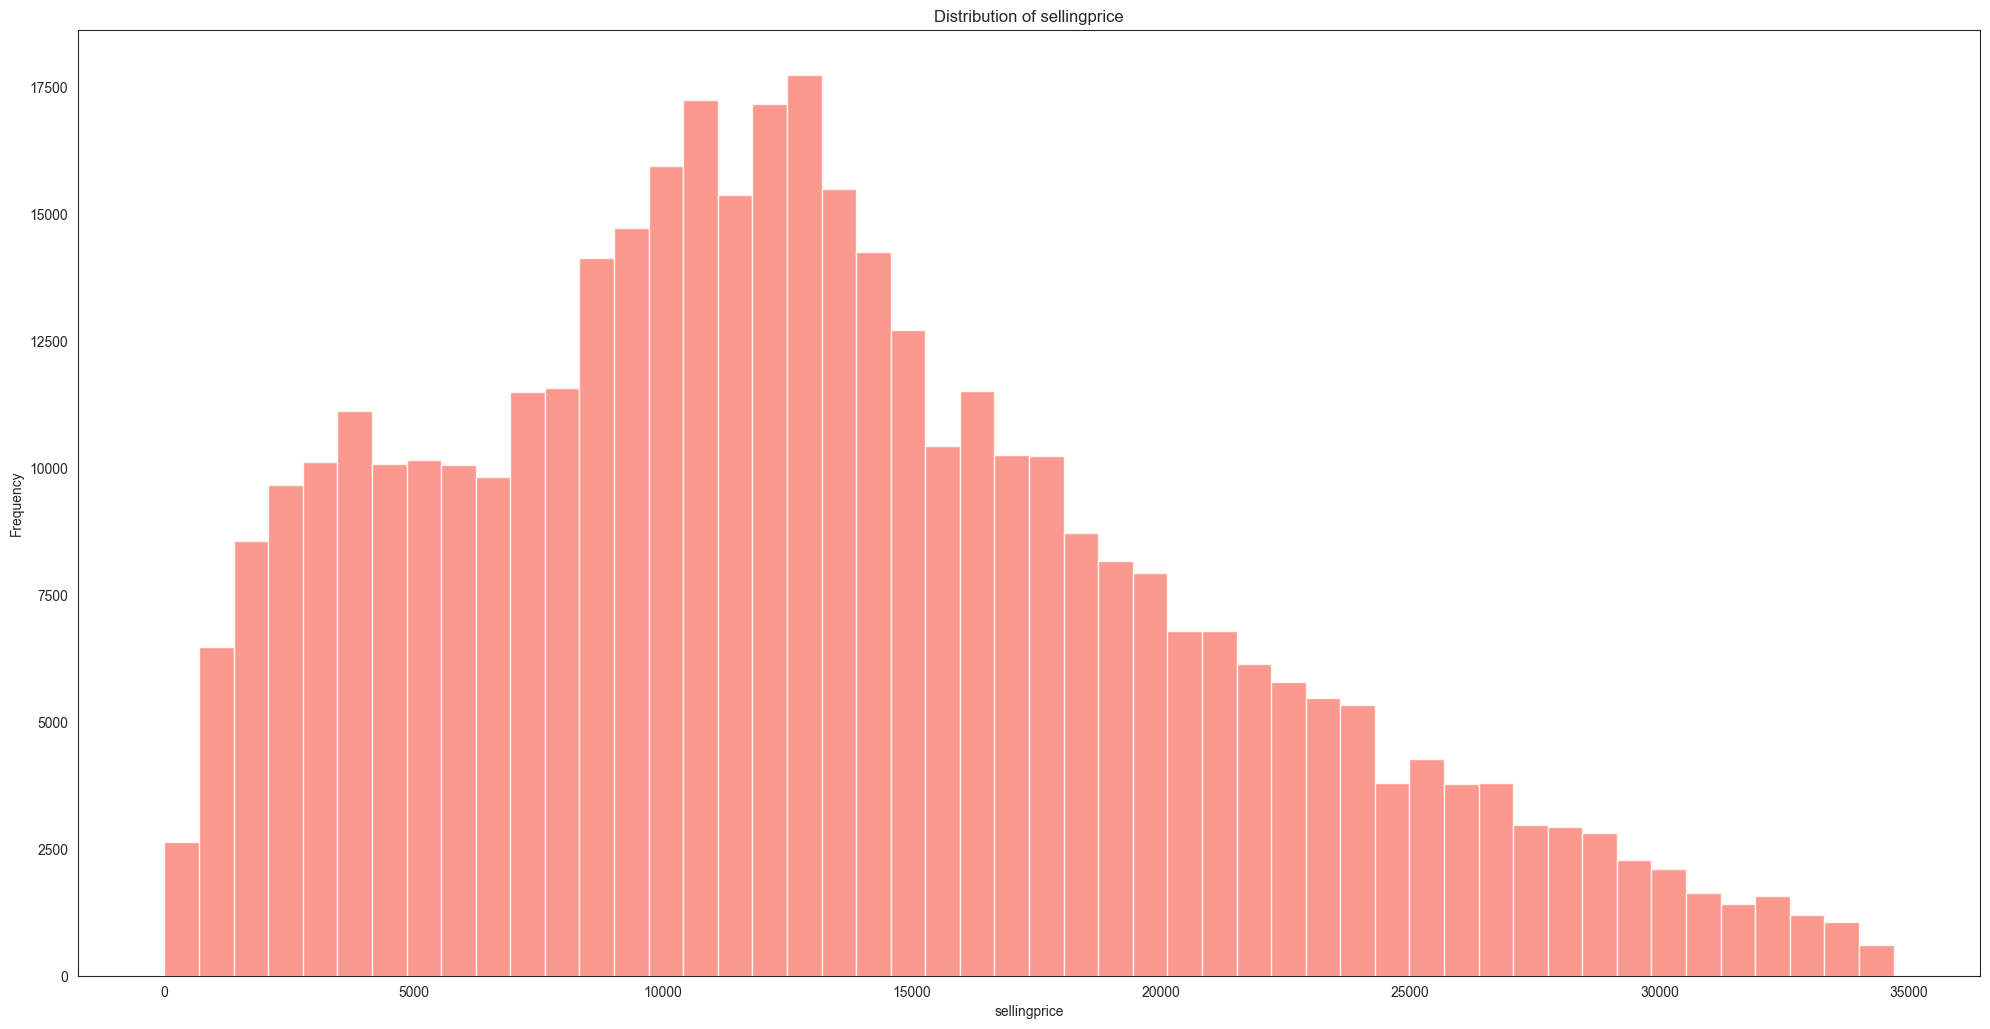

In [40]:
# clean_data
# 
# for col in clean_data.select_dtypes(object):
#     dummies=pd.get_dummies(clean_data[col],prefix=col,dummy_na=False)
#     clean_data=clean_data.drop(columns=col)
#     clean_data=pd.concat([clean_data,dummies],axis=1)

# clean_data
 

### Build an OLS model

In [ ]:
# y = clean_data['sellingprice']
# 
# X = clean_data[['year', 'condition', 'odometer', 'mmr']]
# X = sm.add_constant(X)
# 
# model = sm.OLS(y, X).fit()
# model.summary()

X = clean_data[['year', 'condition', 'odometer', 'mmr']]  
y = clean_data['sellingprice']

X = sm.add_constant(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = sm.OLS(y_train, X_train).fit()

predictions = model.predict(X_test)
model.summary()

In [ ]:
# x_cols = clean_data[: -2]
# 
# 
# def select_model_aic(data, initial_columns, dependent_var_name):
#     """
#     Select variables by AIC
#     :param data: DataFrame
#     :param initial_columns: List of initial columns
#     :param dependent_var_name: Name of the dependent variable
#     :return: AIC DataFrame, best model
#     """
#     best_model = None
#     best_aic = float('inf')
#     columns = initial_columns[:]
#     aic_history = []
# 
#     while True:
#         improvement = False
#         models_with_aic = []
# 
#         for col in columns:
#             temp_columns = [c for c in columns if c != col]
#             temp_x = data[temp_columns]
#             temp_model = sm.OLS(endog=data[dependent_var_name], exog=sm.add_constant(temp_x)).fit()
#             models_with_aic.append((temp_model.aic, col, temp_model))
# 
#         models_with_aic.sort()
# 
#         if models_with_aic and models_with_aic[0][0] < best_aic:
#             best_aic = models_with_aic[0][0]
#             best_model = models_with_aic[0][2]
#             dropped_col = models_with_aic[0][1]
#             aic_history.append({'dropped': dropped_col, 'model_AIC': best_aic})
#             columns = [c for c in columns if c != dropped_col]
#             improvement = True
# 
#         if not improvement:
#             break
#             
#     aic_df = pd.DataFrame(aic_history).style.background_gradient(cmap='viridis').highlight_min(color="red", subset=["model_AIC"])
#     return aic_df, best_model
# 
# dropped_cols, best_model = select_model_aic(df, x_cols.columns, 'sellingprice')
# 
# dropped_cols
